In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [16]:

# --- 1. LOAD DATASET ---
data = pd.read_csv("day.csv")

# --- 2. SELECT ONLY RELEVANT COLUMNS ---
data = data[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

# --- 3. SPLIT FEATURES AND TARGET ---
X = data.drop(columns=['cnt'])
y = data['cnt']

# --- 4. ONE-HOT ENCODE ALL CATEGORICAL COLUMNS ---
categorical_cols = ['season','mnth','weekday','weathersit']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- 5. SCALE ALL FEATURES except dummy collumns (1/0) ---
scaler = StandardScaler()
numeric_cols = ['temp','atemp','windspeed','holiday','workingday']
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])


# --- 6. CONVERT TO NUMPY ARRAYS ---
X_scaled = scaler.fit_transform(X_encoded)   # should be scaled
y = y.to_numpy(dtype=np.float64).reshape(-1, 1)

In [18]:
# --- 7. CROSS-VALIDATION SETUP ---
kf = KFold(n_splits=5, shuffle=True)
r2_scores, rmse_scores, mae_scores = [], [], []

fold = 1

# --- 8. 5-FOLD TRAINING LOOP ---
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    # Model
    model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Fold {fold}: R²={r2:.3f}, RMSE={rmse:.2f}, MAE={mae:.2f}")
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    fold += 1

print("\n=== Average Model Performance Across 5 Folds ===")
print(f"Average R²   : {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"Average RMSE : {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Average MAE  : {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fold 1: R²=0.887, RMSE=702.01, MAE=481.00


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fold 2: R²=0.863, RMSE=694.09, MAE=509.92


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fold 3: R²=0.864, RMSE=713.33, MAE=502.01


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fold 4: R²=0.876, RMSE=694.41, MAE=503.32


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fold 5: R²=0.863, RMSE=658.56, MAE=489.38

=== Average Model Performance Across 5 Folds ===
Average R²   : 0.870 ± 0.010
Average RMSE : 692.48 ± 18.34
Average MAE  : 497.13 ± 10.45


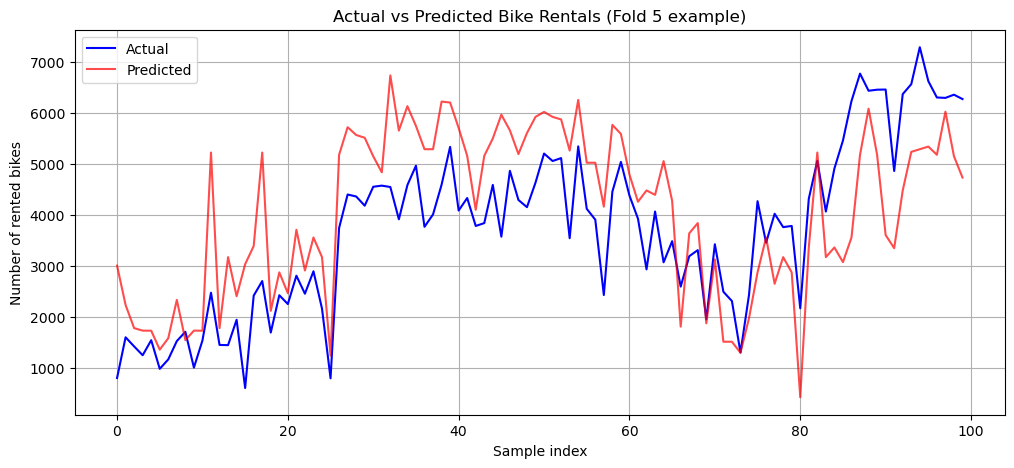

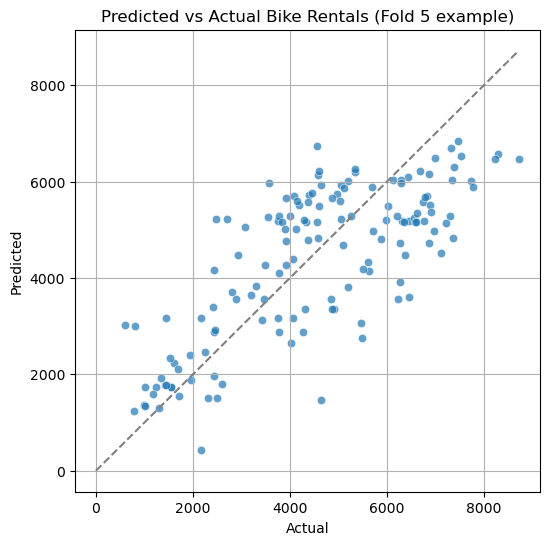

In [4]:
# --- 9. FINAL MODEL ON FULL DATA ---
final_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
final_model.fit(X_scaled, y)

# --- 10. VISUALIZATION (using last fold) ---
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred[:100], label="Predicted", color='red', alpha=0.7)
plt.title("Actual vs Predicted Bike Rentals (Fold 5 example)")
plt.xlabel("Sample index")
plt.ylabel("Number of rented bikes")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], '--', color='gray')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Bike Rentals (Fold 5 example)")
plt.grid(True)
plt.show()


In [5]:
# --- 11. TEST A SPECIFIC DAY PREDICTION ---
# Example day input
# Season: 1=winter,2=spring,3=summer,4=fall
# Mnth: 1-12, holiday=0/1, workingday=0/1, weathersit=1-4
test_day = {
    'season': 3,      # summer
    'mnth': 7,        # July
    'holiday': 0,
    'workingday': 1,
    'weathersit': 1,  # clear day
    'temp': 0.7,      # normalized temperature
    'atemp': 0.68
}

# Convert to DataFrame and one-hot encode
test_df = pd.DataFrame([test_day])
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align columns with training data
test_df = test_df.reindex(columns=X_encoded.columns, fill_value=0)

# Scale
test_scaled = scaler.transform(test_df)

# Predict
predicted_bikes = final_model.predict(test_scaled)[0]
print(f"\nPredicted total bike rentals for this day: {predicted_bikes:.0f}")


Predicted total bike rentals for this day: 5489
